In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import shapiro

In [67]:
data=pd.read_excel(r'C:/Users/Admin/1  Bharat Digital Python files(Udaanous)/13-05-25/practice_data.xlsx')
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy of Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


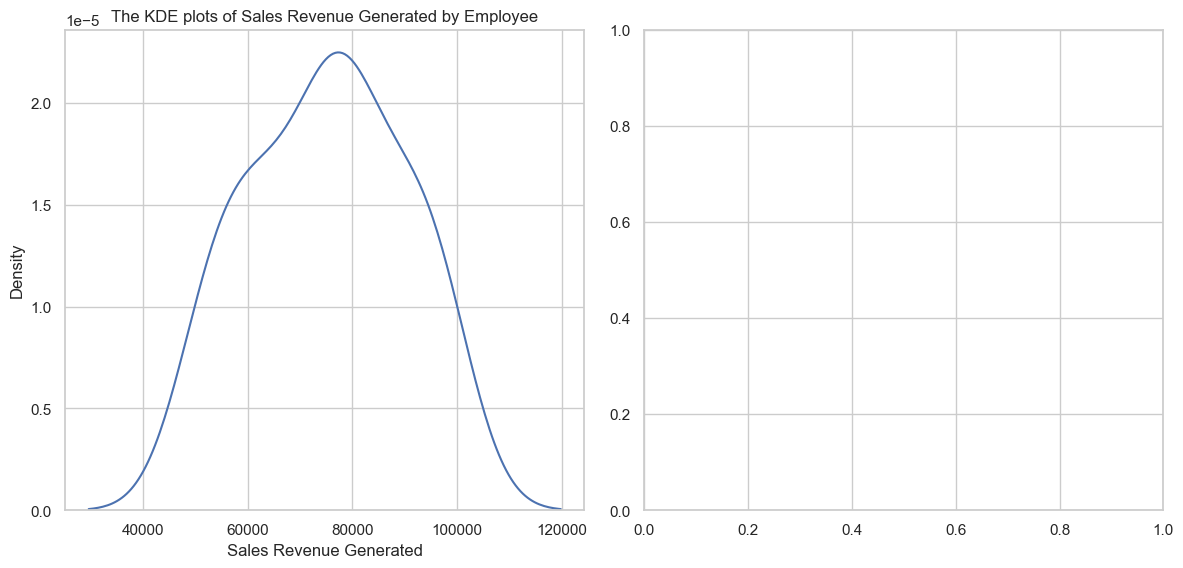

<Figure size 640x480 with 0 Axes>

In [83]:
# Check Distribution

numeric_columns = ['Sales Revenue Generated','EmployeeID']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for index, column in enumerate(numeric_columns):
    sns.kdeplot(data[column], ax=axes[index])
    axes[index].set_title('The KDE plots of Sales Revenue Generated by Employee')
    plt.tight_layout()
    plt.show()

In [70]:
# Normality Test
numeric_columns = ['Days Present', 'Task Completion Rates',
                   'Interpersonal Skills Rating', 'Decision-Making Skills Rating',
                   'Sales Revenue Generated']
shapiro_results = {}
for column in numeric_columns:
    stat, p_value = shapiro(data[column])
    shapiro_results[column] = round(p_value, 3)
    shapiro_results
print(shapiro_results)

{'Days Present': 0.044, 'Task Completion Rates': 0.321, 'Interpersonal Skills Rating': 0.015, 'Decision-Making Skills Rating': 0.004, 'Sales Revenue Generated': 0.12}


In [71]:
# square root transformation , finding p valu 
column_name=data['Sales Revenue Generated']
def sqrt_transformation(data,column_name):
    data[f'{column_name}_sqrt'] = np.sqrt(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_sqrt'])
    distribution = sns.kdeplot(data[f'{column_name}_sqrt'])
    print(distribution)
print('p-value: ', p_value)

p-value:  0.1195773333311081


In [72]:
# long transformation
column_name=data['Sales Revenue Generated']
def log_transformation(data, column_name):
    data[f'{column_name}_log'] = np.log(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_log'])
    distribution = sns.kdeplot(data[f'{column_name}_log'])
    print(distribution)
print('p-value: ', p_value)

p-value:  0.1195773333311081


Questions for this assignment
What is the range of highest number of sales revenue generated?


In [75]:
# Calculate min, max, and range
max_revenue = data['Sales Revenue Generated'].max()
min_revenue = data['Sales Revenue Generated'].min()
revenue_range = max_revenue - min_revenue

print(f"Max Revenue: ₹{max_revenue}")
print(f"Min Revenue: ₹{min_revenue}")
print(f"Revenue Range: ₹{revenue_range}")

Max Revenue: ₹97797
Min Revenue: ₹51638
Revenue Range: ₹46159


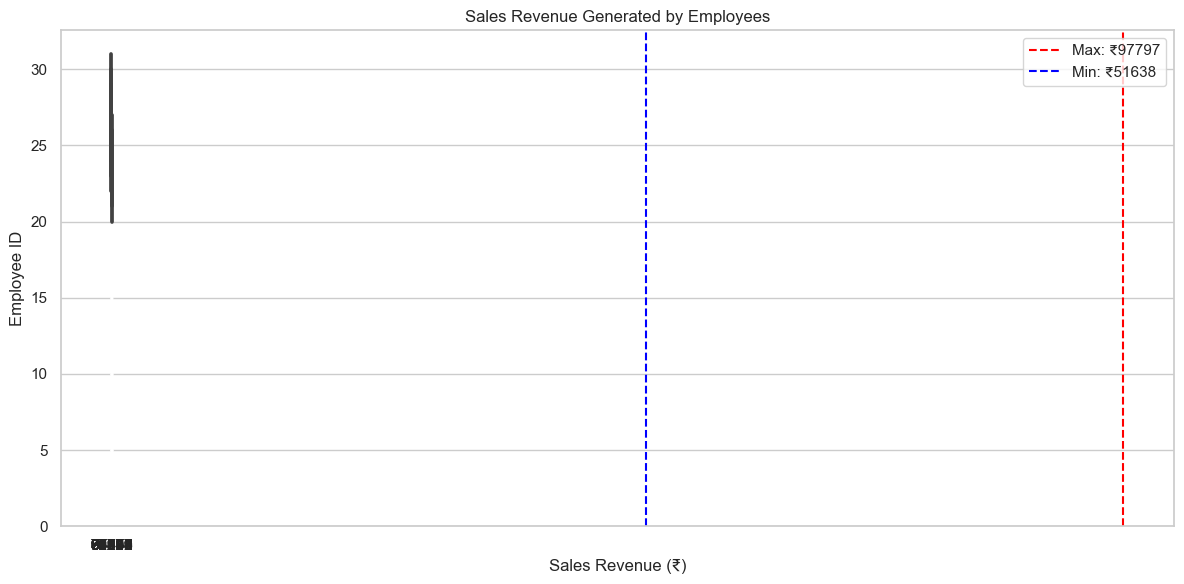

In [85]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Sales Revenue Generated',
    y='EmployeeID',
    data=data.sort_values('Sales Revenue Generated', ascending=False),
    palette='viridis'
)

# Add vertical lines for min and max revenue
plt.axvline(max_revenue, color='red', linestyle='--', label=f'Max: ₹{max_revenue}')
plt.axvline(min_revenue, color='blue', linestyle='--', label=f'Min: ₹{min_revenue}')
# Chart labels
plt.title('Sales Revenue Generated by Employees')
plt.xlabel('Sales Revenue (₹)')
plt.ylabel('Employee ID')
plt.legend()
plt.tight_layout()
plt.show()

Q1: ₹63065.0
Q3: ₹86373.0
IQR: ₹23308.0
Upper bound (start of high range): ₹121335.0

Employees who generated high sales revenue:
Empty DataFrame
Columns: [EmployeeID, Sales Revenue Generated]
Index: []


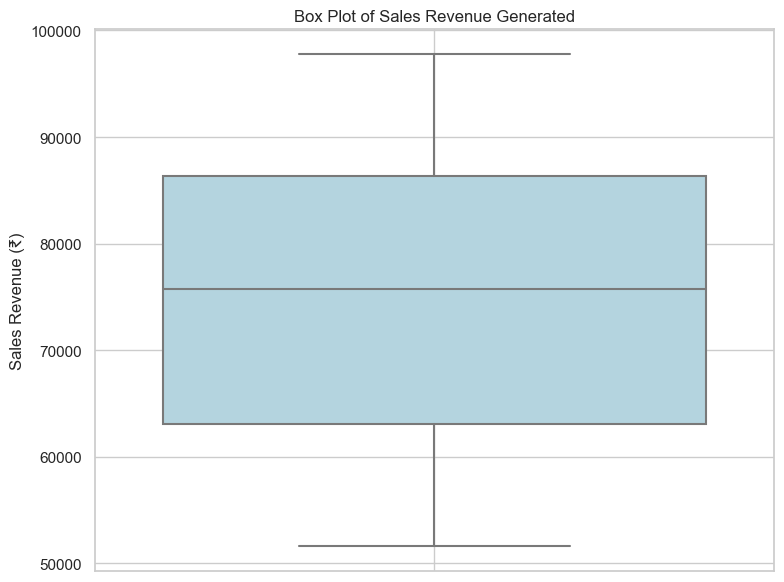

In [89]:
# with box plot

# Get the sales revenue column
revenue = data['Sales Revenue Generated']

# Calculate Q1, Q3, and IQR
Q1 = revenue.quantile(0.25)
Q3 = revenue.quantile(0.75)
IQR = Q3 - Q1

# Define the high range (above upper whisker)
upper_bound = Q3 + 1.5 * IQR

# Filter employees who fall in this high range
high_revenue_employees = data[revenue > upper_bound]

# Show results
print(f"Q1: ₹{Q1}")
print(f"Q3: ₹{Q3}")
print(f"IQR: ₹{IQR}")
print(f"Upper bound (start of high range): ₹{upper_bound}\n")
print("Employees who generated high sales revenue:")
print(high_revenue_employees[['EmployeeID', 'Sales Revenue Generated']])


# Box plot for Sales Revenue Generated
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Sales Revenue Generated'], color='lightblue')

# Add labels and title
plt.title('Box Plot of Sales Revenue Generated')
plt.ylabel('Sales Revenue (₹)')
plt.grid(True)

plt.tight_layout()
plt.show()